1. Download Lena color image, convert it to grayscale image and add salt and pepper noise with noise quantity 0.1,0.2 up to 1 and generate 10 noisy images.
2. Correlate each noisy image with Gaussian filters of varying size. Filter size can be 3 x 3, 5 x 5 and 7 x 7.

<ins>Note</ins>: 
    Use σ=1 for Gaussian filter. Use predefined as well as user defined functions for the above problems (for correlation).

In [4]:
# This Assignment is done by CS20B1044 Avinash R Changrani
# importing required libraries

import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

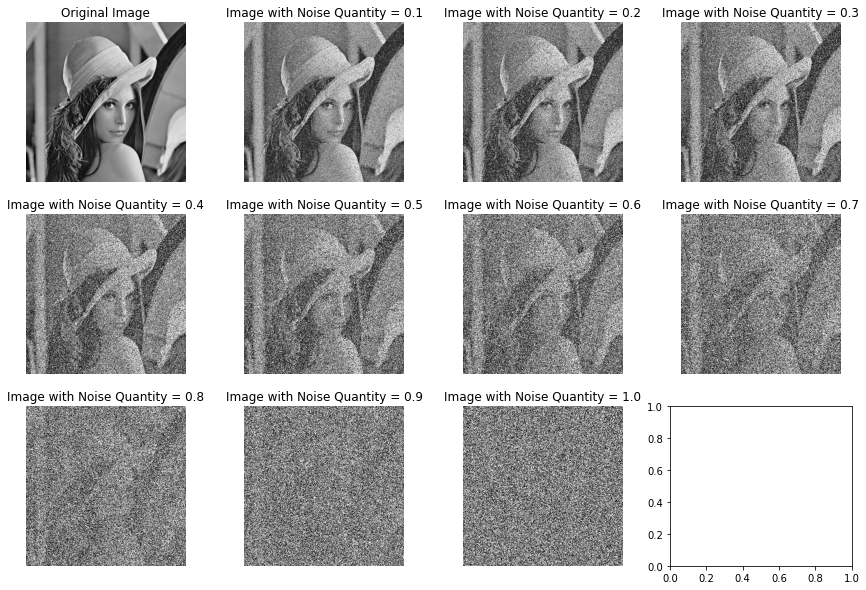

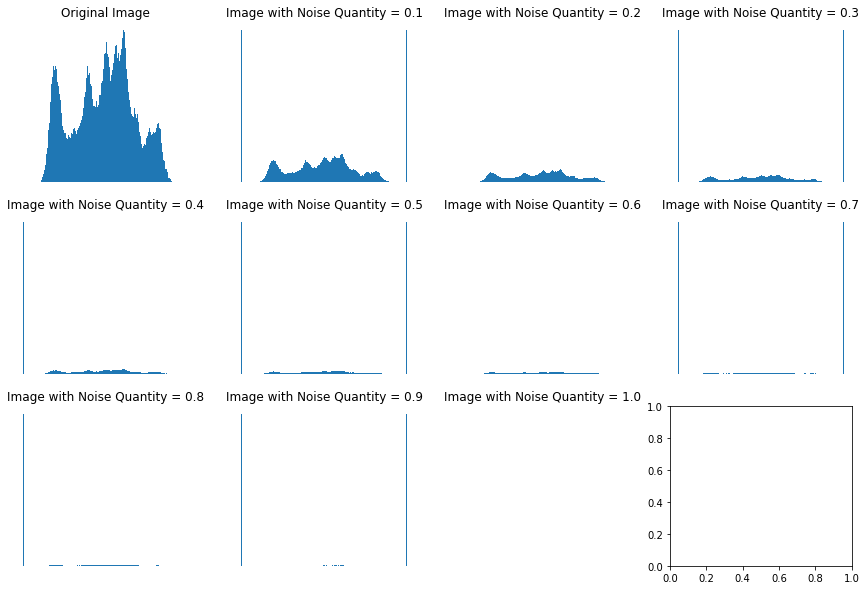

In [5]:
# Loading Lena color image, convert it to grayscale image and add salt and pepper noise with noise quantity 0.1,0.2 up to 1 and generate 10 noisy images.

# Load the image
img = cv2.imread('Lena.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

noisy_images = []

# Generate 10 noisy images with salt and pepper noise
for i in range(1, 11):
    # Calculate the noise quantity for this iteration
    noise_quantity = i / 10.0
    
    # Create a copy of the grayscale image to add noise to
    noisy = np.copy(gray)
    
    # Generate salt and pepper noise
    mask = np.random.choice((0, 1, 2), size=noisy.shape[:2], p=[1 - noise_quantity, noise_quantity / 2.0, noise_quantity / 2.0])
    noisy[mask == 1] = 0
    noisy[mask == 2] = 255
    
    # Add the noisy image to the list
    noisy_images.append(noisy)

# a figure to plot the noisy images and the original image
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].imshow(noisy_images[i - 1], cmap='gray')
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

plt.show()

# we use histograms to show the distribution of pixel intensities in the noisy images
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].hist(gray.ravel(), 256, [0, 256])
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].hist(noisy_images[i - 1].ravel(), 256, [0, 256])
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

plt.show()

In [6]:
# Correlate each noisy image with Gaussian filters of varying size. Filter size can be 3 x 3, 5 x 5 and 7 x 7.

sizes = [3,5,7]
kernel_list = []

for size in sizes:
    # Create a 1D Gaussian kernel with the given size and standard deviation 1
    kernel = cv2.getGaussianKernel(size,1)
    # Create a 2D kernel out of the 1D kernel
    # kernel = kernel * kernel.T
    kernel = np.outer(kernel, kernel.transpose())
    # Normalize the kernel to ensure that the sum of its elements is equal to 1
    kernel = kernel / np.sum(kernel)
    kernel_list.append(kernel)


# Inbuilt function to apply gaussian filter
def correlate_inbuilt(image, kernel):
    # Correlate the image with the kernel using cv2.filter2D()
    filtered = cv2.filter2D(image, -1, kernel)
    return filtered

# Userdefined function to apply gaussian filter
def correlate_userdefined(image, kernel):
    # Flip the kernel along both axes
    kernel = np.flip(np.flip(kernel, 0), 1)
    
    # Get the dimensions of the image and kernel
    iH, iW = image.shape
    kH, kW = kernel.shape
    
    # Compute the padding needed to keep the output the same size as the input
    padH = int((kH - 1) / 2)
    padW = int((kW - 1) / 2)
    
    # Pad the input image with zeros
    padded = np.pad(image, ((padH, padH), (padW, padW)), mode='constant')
    
    # Initialize the output image
    output = np.zeros_like(image)
    
    # Loop over the pixels in the input image
    for y in range(padH, iH + padH):
        for x in range(padW, iW + padW):
            # Extract the region of interest (ROI) from the padded image
            roi = padded[y - padH:y + padH + 1, x - padW:x + padW + 1]
            
            # Compute the correlation between the ROI and the kernel
            correlation = np.sum(roi * kernel)
            
            # Set the corresponding pixel in the output image to the correlation value
            output[y - padH, x - padW] = correlation
    
    return output

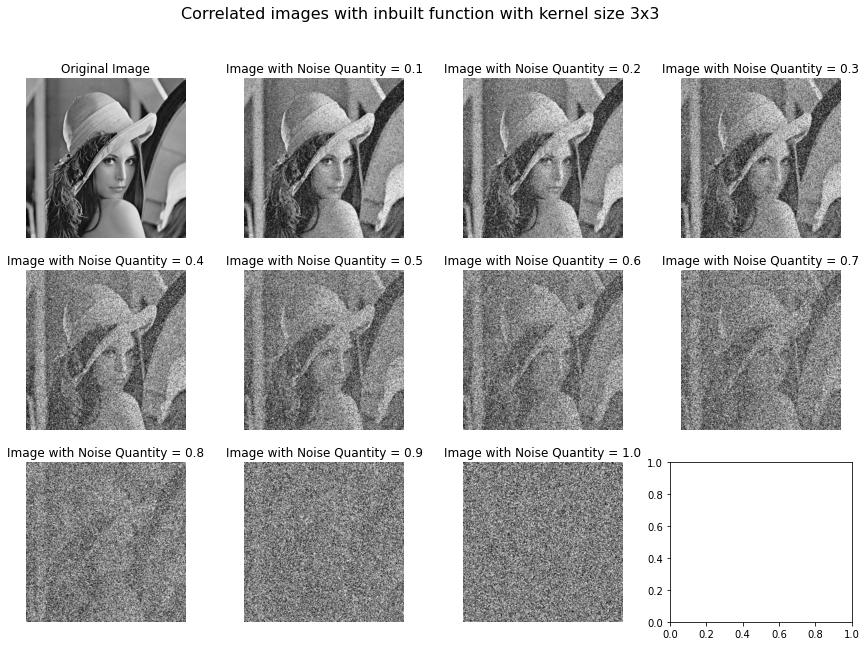

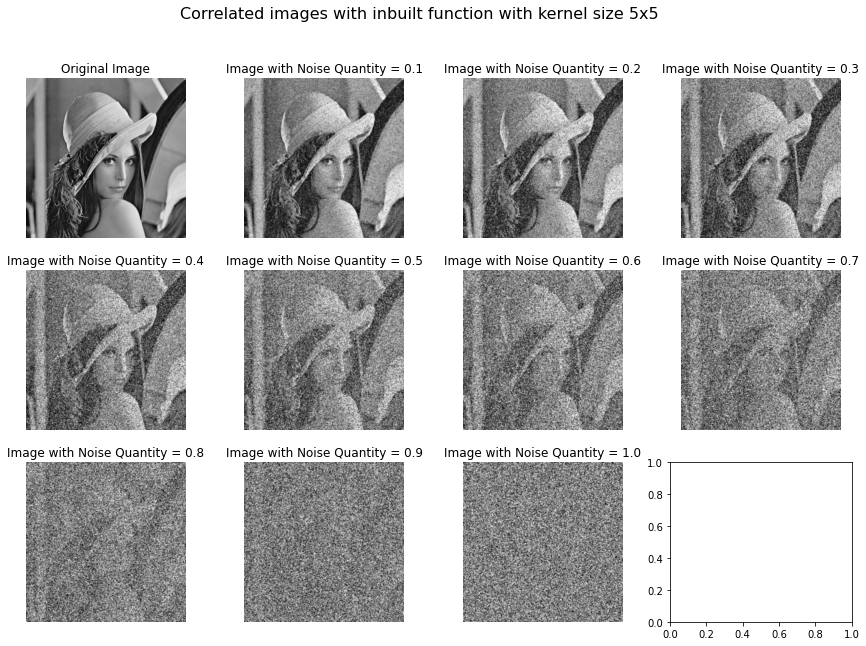

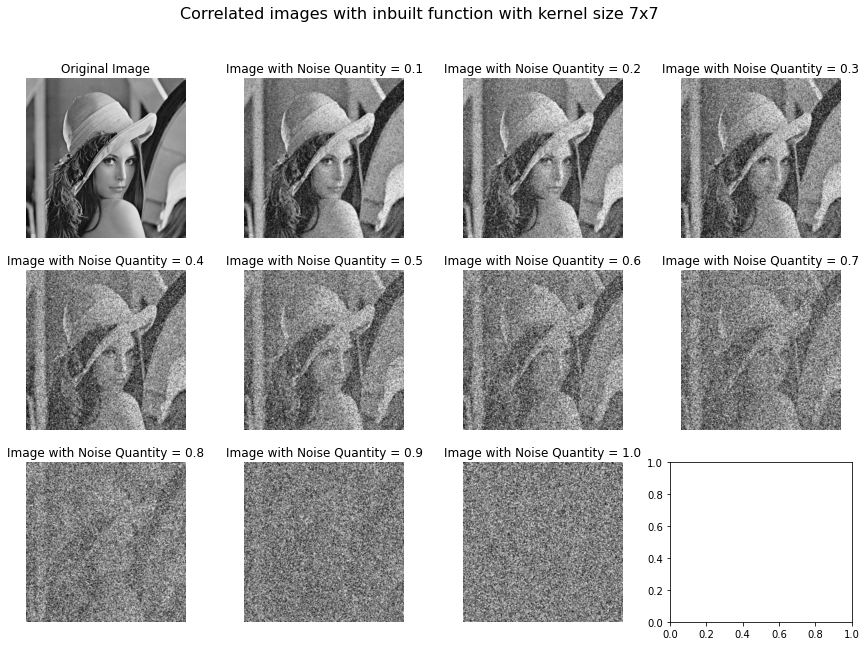

In [7]:
correlated_images_inbuilt = []
correlated_images_userdefined = []

for noisy in noisy_images:
    correlated_inbuilt = []
    correlated_userdefined = []
    for kernel in kernel_list:
        # Apply the filter to the noisy image
        correlated_inbuilt.append(correlate_inbuilt(noisy, kernel))
        correlated_userdefined.append(correlate_userdefined(noisy, kernel))
    correlated_images_inbuilt.append(correlated_inbuilt)
    correlated_images_userdefined.append(correlated_userdefined)

# Plot the correlated images using inbuilt function with different filter sizes
# 3 x 3 filter
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].imshow(correlated_images_inbuilt[i - 1][0], cmap='gray')
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

fig.suptitle('Correlated images with inbuilt function with kernel size 3x3', fontsize=16)
plt.show()

# 5 x 5 filter
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].imshow(correlated_images_inbuilt[i - 1][1], cmap='gray')
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

fig.suptitle('Correlated images with inbuilt function with kernel size 5x5', fontsize=16)
plt.show()

# 7 x 7 filter
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].imshow(correlated_images_inbuilt[i - 1][2], cmap='gray')
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

fig.suptitle('Correlated images with inbuilt function with kernel size 7x7', fontsize=16)
plt.show()

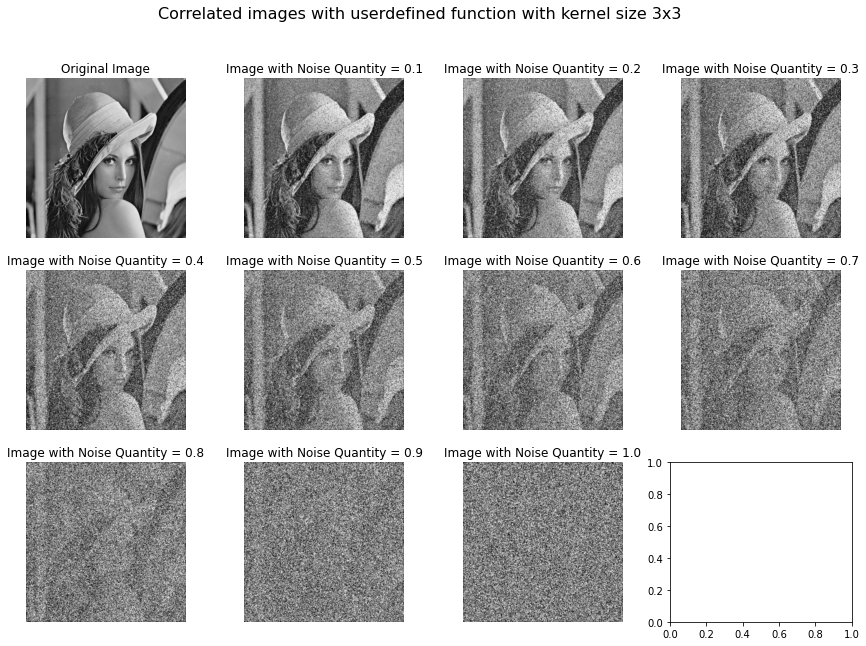

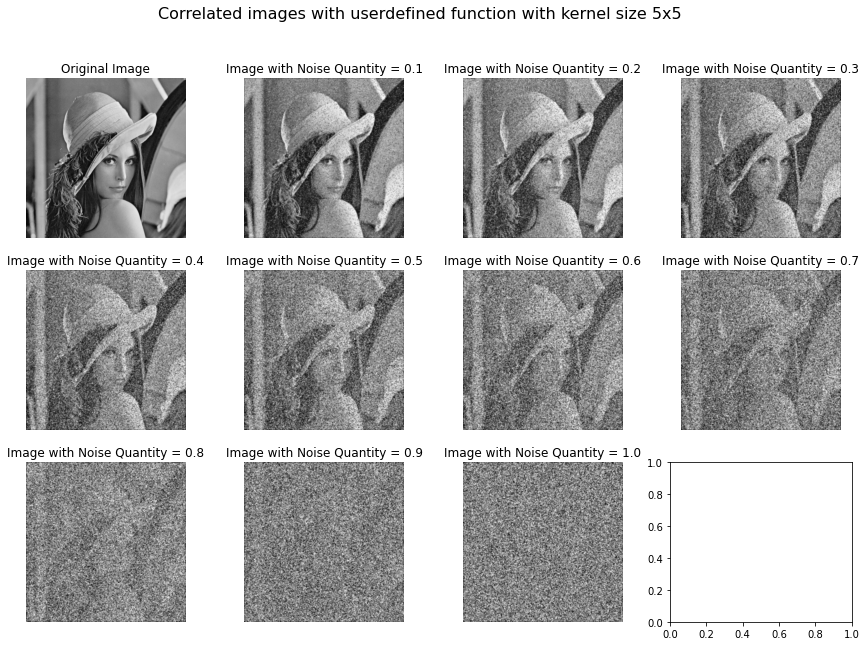

In [8]:
# Plot the correlated images using userdefined function with different filter sizes
# 3 x 3 filter
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].imshow(correlated_images_userdefined[i - 1][0], cmap='gray')
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

fig.suptitle('Correlated images with userdefined function with kernel size 3x3', fontsize=16)

plt.show()

# 5 x 5 filter
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].imshow(correlated_images_userdefined[i - 1][1], cmap='gray')
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

fig.suptitle('Correlated images with userdefined function with kernel size 5x5', fontsize=16)

plt.show()

# 7 x 7 filter
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].imshow(correlated_images_userdefined[i - 1][2], cmap='gray')
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

fig.suptitle('Correlated images with userdefined function with kernel size 7x7', fontsize=16)

plt.show()


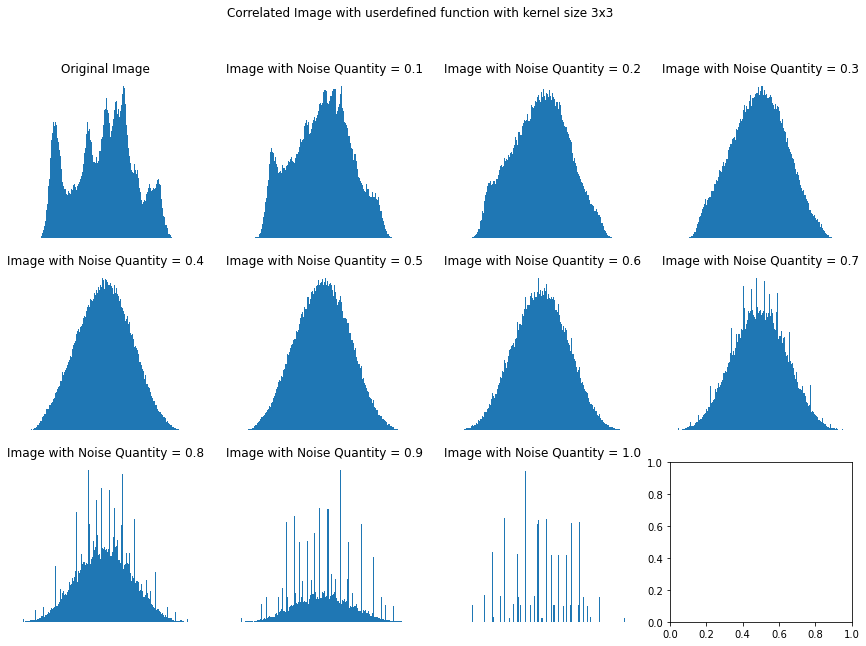

In [9]:
# we use histograms to show the distribution of pixel intensities in the correlated images
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].hist(gray.ravel(), 256, [0, 256])
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].hist(correlated_images_inbuilt[i - 1][0].ravel(), 256, [0, 256])
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

plt.suptitle('Correlated Image with inbuilt function with kernel size 3x3')

plt.show()

fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].hist(gray.ravel(), 256, [0, 256])
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].hist(correlated_images_userdefined[i - 1][0].ravel(), 256, [0, 256])
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

plt.suptitle('Correlated Image with userdefined function with kernel size 3x3')

plt.show()

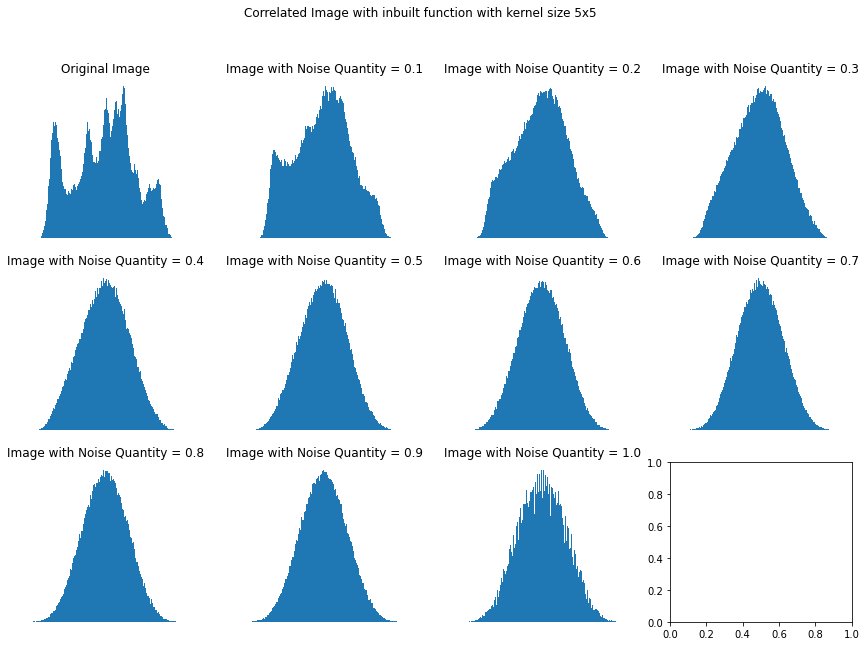

In [10]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].hist(gray.ravel(), 256, [0, 256])
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].hist(correlated_images_inbuilt[i - 1][1].ravel(), 256, [0, 256])
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

plt.suptitle('Correlated Image with inbuilt function with kernel size 5x5')

plt.show()

fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].hist(gray.ravel(), 256, [0, 256])
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].hist(correlated_images_userdefined[i - 1][1].ravel(), 256, [0, 256])
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

plt.suptitle('Correlated Image with userdefined function with kernel size 5x5')

plt.show()

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].hist(gray.ravel(), 256, [0, 256])
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].hist(correlated_images_inbuilt[i - 1][2].ravel(), 256, [0, 256])
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

plt.suptitle('Correlated Image with inbuilt function with kernel size 7x7')

plt.show()

fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].hist(gray.ravel(), 256, [0, 256])
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].hist(correlated_images_userdefined[i - 1][2].ravel(), 256, [0, 256])
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

plt.suptitle('Correlated Image with userdefined function with kernel size 7x7')

plt.show()

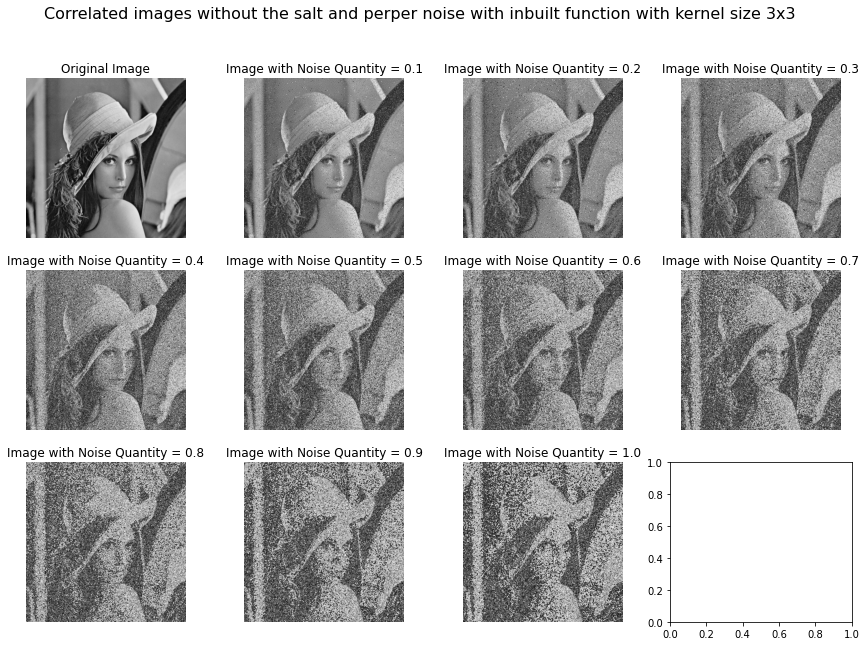

In [16]:
# plot the images - the noisy image to see the difference
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs[0, 0].imshow(gray, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i in range(1, 11):
    axs[i // 4, i % 4].imshow((correlated_images_inbuilt[i - 1][0] - (gray - noisy_images[i-1])), cmap='gray')
    axs[i // 4, i % 4].set_title('Image with Noise Quantity = ' + str(i / 10.0))
    axs[i // 4, i % 4].axis('off')

fig.suptitle('Correlated images without the salt and perper noise with inbuilt function with kernel size 3x3', fontsize=16)

plt.show()

## Conclusion :

When we apply a Gaussian filter to a noisy image using correlation, we typically observe that the filter smooths out the noise and enhances the underlying features of the image. The amount of noise reduction depends on the size of the filter kernel and the amount of noise in the original image.

The size of the Gaussian kernel determines the extent of the smoothing effect. A larger kernel leads to more aggressive smoothing and more noise reduction, but also more blurring of the image details. Conversely, a smaller kernel leads to less smoothing and less noise reduction, but also less blurring of the image details.

Overall, applying a Gaussian filter to a noisy image using correlation can be an effective way to reduce noise and enhance the features of the image.